# Mathematical Methods in Data Science and Signal Processing
Homework assignment 1
by: Ariel Kantorovich



In [1]:
import matplotlib.pyplot as plt
import numpy as np

Question 5:

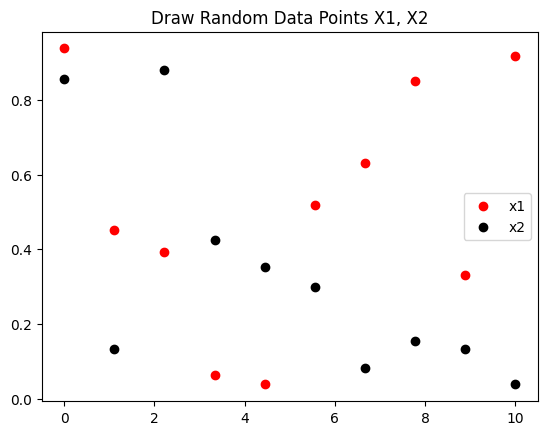

In [2]:
n = 2000
p = 10

x1 = np.random.rand(1,p)
x2 = np.random.rand(1,p)

x = np.linspace(0,p,p)


plt.scatter(x, x1, c='r', label="x1")
plt.scatter(x, x2, c='k', label="x2")
plt.legend()
plt.title("Draw Random Data Points X1, X2")
plt.show()

Generate Y:
$Y = [y_{1}, y_{2}, .... , y_{n}]$

where:

$y_{i}\in\mathbb{R}^{p}$ <br>
$Y\in\mathbb{R}^{pxn}$

In [3]:
mu = 0
sigma = 1

a = np.random.normal(mu, sigma, size = (n,1))
b = np.random.normal(mu, sigma, size = (n,1))
pts = n//p
S = np.array(np.logspace(1,6,num=pts))
eigen_ratio = np.zeros(pts)
sing_ratio = np.zeros(pts)

for i,s in enumerate(S):
  Y = s * a.dot(x1) + b.dot(x2)
  # Covariance, Eigenvalues, Singular Values
  covar = np.cov(Y, rowvar = False)
  eigen_vals = np.sort(np.linalg.eigvals(covar))[::-1]
  sing_vals = np.linalg.svd(Y, compute_uv=False)
  eigen_ratio[i] = eigen_vals.real[0] / eigen_vals.real[1]
  sing_ratio[i] = sing_vals[0] / sing_vals[1]

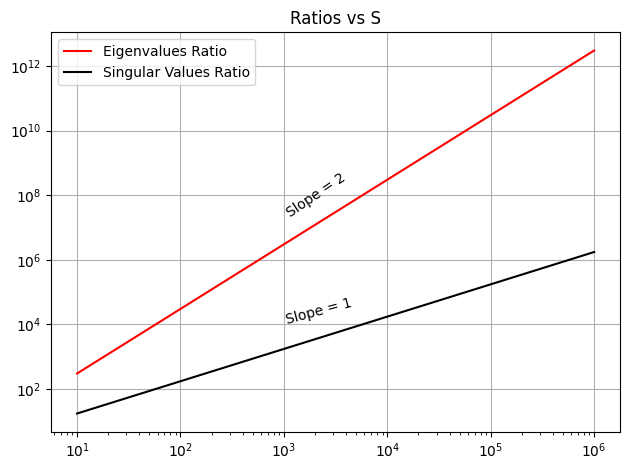

In [4]:
plt.loglog(S, eigen_ratio, 'r', label='Eigenvalues Ratio')
plt.loglog(S, sing_ratio, 'k', label='Singular Values Ratio')

slope1, intercept1 = np.polyfit(np.log(S), np.log(eigen_ratio), 1)
slope2, intercept2 = np.polyfit(np.log(S), np.log(sing_ratio), 1)

plt.text(10e2, 10e7, "Slope = %.0f" %slope1, size=10, rotation=17*slope1,
         ha="left", va="center")

plt.text(10e2, 2.5*10e3, "Slope = %.0f" %slope2, size=10, rotation=15*slope2,
         ha="left", va="center")

plt.title('Ratios vs S')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

**Note:** The slope on the graph is rounded by polyfit for representation but they are close to the real number.<br>
Conclusion: <br>
Let's look at the eigen values covariance $\frac{\lambda_{1}}{\lambda_{2}} = \frac{\sigma_{1}^{2}}{\sigma_{2}^{2}}$ if we apply log we get $2 * \log(\frac{\sigma_{1}}{\sigma_{2}})$ this is exactly two times of SVD ratio so the theorem and what we get on the graph make sense. <br>
If we look at the graph of the eigenvalues we see that we get a high ratio $\approx 10^{12}$ which is
dangerously close to the native limit precision of ordinary processors  we can get numerical errors,  so it will be better to use the SVD

Question 6:

In [17]:
def marchenko_pastur_mu(x, gamma):
    """
    :param x: eigen values 1d numpy array
    :param gamma: p/n (float)
    :return:
    """
    F = np.zeros_like(x)
    gamma_plus = (1 + np.sqrt(gamma)) ** 2
    gamma_minus = (1 - np.sqrt(gamma)) ** 2
    is_nonzero = (gamma_minus < x) &  (x < gamma_plus)
    x_valid = x[is_nonzero]
    factor = 1 / (2 * np.pi * gamma)
    F[is_nonzero] = factor / x_valid
    F[is_nonzero] *= np.sqrt((gamma_plus - x_valid) * (x_valid - gamma_minus))
    if gamma > 1:
        F[x == 0] = 1 - 1 / gamma
    return F

In [18]:
n = 2000
p = 500
sigma = 1
mu = 0

x = sigma * np.random.randn(p, n) + mu
X = 1 / n * (x @ x.T)
eigen_vals = np.linalg.eigvals(X)

x_axis = np.linspace(0, np.max(eigen_vals), 100)
F = marchenko_pastur_mu(x_axis, gamma=p/n)

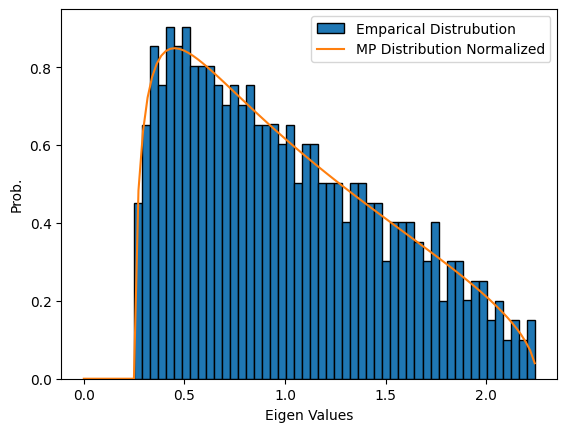

In [22]:
bins = 50
plt.hist(eigen_vals, bins, density=True, edgecolor='k', label='Emparical Distrubution')
plt.plot(x_axis, F, label='MP Distribution Normalized')
plt.xlabel("Eigen Values"), plt.ylabel("Prob."), plt.legend()
plt.show()

6b. Spike Model simulation

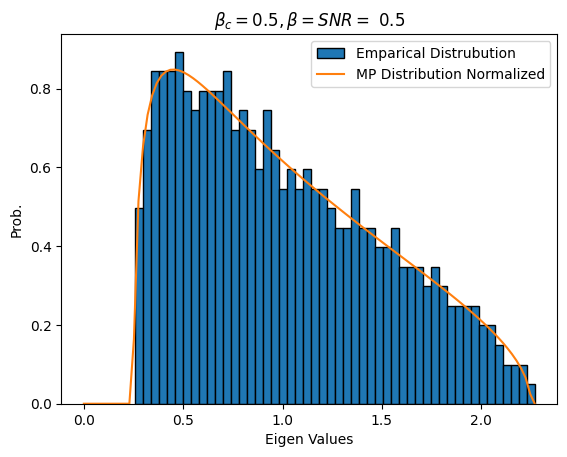

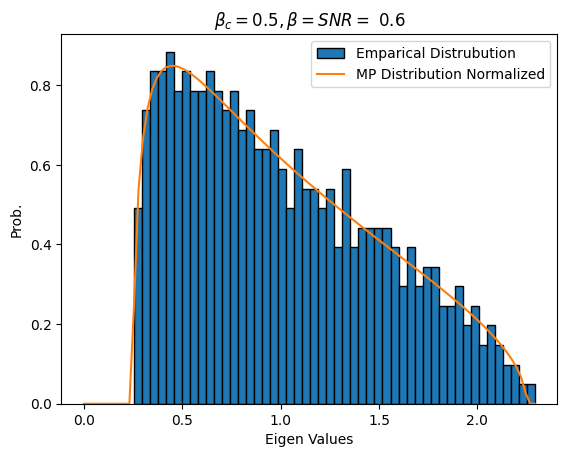

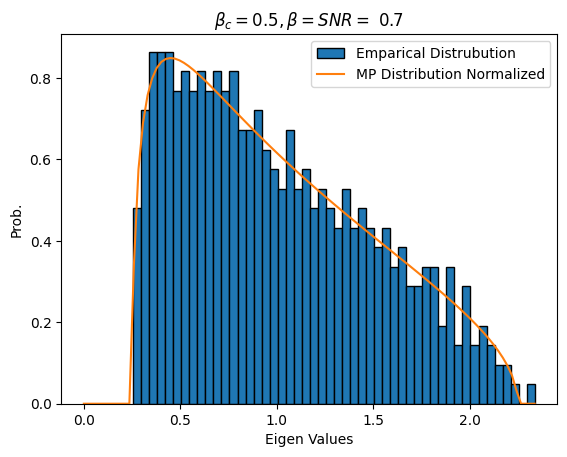

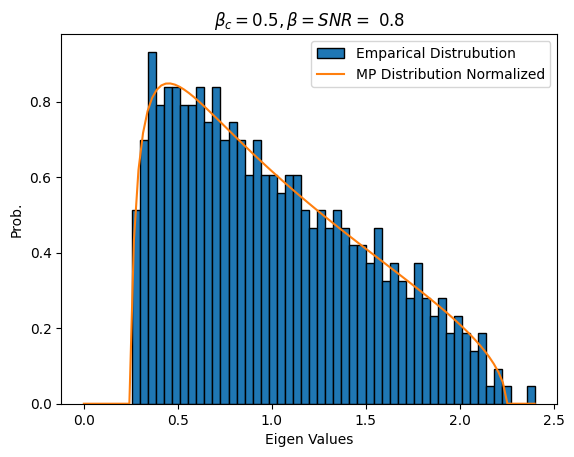

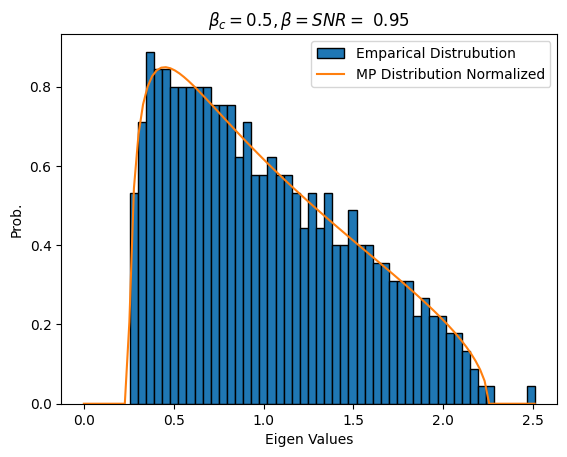

In [37]:
beta_c = 0.5
beta_list = [0.5, 0.6, 0.7, 0.8, 0.95]
bins = 50
g = np.random.normal(0, 1, size=(p, n))
g0 = np.random.normal(0, 1, size=(p, 1))
u = np.random.normal(0, 1, size=(p, 1))
u = u / np.linalg.norm(u)

for beta in beta_list:
    x_spike = g + np.sqrt(beta) * g0 * u
    X = 1/n * (x_spike @ x_spike.T)
    eigen_vals = np.linalg.eigvals(X)
    x_axis = np.linspace(0, np.max(eigen_vals), 100)
    F = marchenko_pastur_mu(x_axis, gamma=p/n)
    plt.hist(eigen_vals, bins, density=True, edgecolor='k', label='Emparical Distrubution')
    plt.plot(x_axis, F, label='MP Distribution Normalized')
    plt.xlabel("Eigen Values"), plt.ylabel("Prob."), plt.title(rf"$\beta_c = 0.5,  \beta=SNR=$ {beta}"), plt.legend()
    plt.show()

Conclusion:
By theorem $\beta > \beta_{c}=\sqrt{\frac{p}{n}}=0.5$ We can see in the empirical results that when $\beta >= 0.7$ we see the signal
popping out the noise bulk, there is some difference between the theoretical and empirical results.